# Plan:

#### 1.) Top Closest Friends in South Park: bigram analysis of character string in conversations for each season

#### 2.) Charaters with Biggest Vocabulary: distinct word count for each character for each season

#### 3.) Kevin's Destiny Over Seasons: string matching to count how many times Kevin died in each season

#### 4.) Most Popular Topics in South Park: topic model for each episode of each season


There are no restrictions on or requirements for what you might want to analyze. To help get you started thinking, a few ideas include:

- What are the topics of the script? You could make a break down by character. Do these topics evolve over time (e.g., by act)?
- Who talks (spends time) with whom? Does it change over time? Which fraction of the talk does each speaker contribute?
- What is the mood of each speaker (e.g., the average sentiment of the words they utter)? Does it change over time? Does it depend on who they are talking to or who or what they are talking about?
- Who or what does each speaker talk about? What is the sentiment of the speaker about each entity (i.e., what is the sentiment of the words that appear near them in the dialogue?). You will probably want to do coreference resolution (to identify what pronouns matches what noun) when identifying who talks about what or whom. In dialogs, participants agree about the antecedents of pronouns, so you may want to process consecutive utterances from the various dialogue participants as a single unit of text for the purpose of coreference resolution.
- What are the Named Entities (e.g., people, places, organizations) that appear in your script? Are there any generalizations about when or where they appear?
- What are the similarities between the characters in the script (e.g., defined in terms of vector similarity between each character’s ‘corpus’? Which characters are the most and least similar to each other, and do these results have an intuitive explanation?


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#enable IPython to display matplotlib graphs
%matplotlib inline
import csv

In [101]:
#read in data
data=pd.read_csv('South_Park_Dialogues_Parsed.csv')
data.head(10)
data.shape

(70896, 5)

In [102]:
data.head(10)

,Season,Episode,Character,Line,parsed_Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \r\n","['guy', 'guy', 'chef', 'go', 'away']"
1,10,1,Kyle,Going away? For how long?\r\n,"['go', 'away', 'long']"
2,10,1,Stan,Forever.\r\n,['forever']
3,10,1,Chef,I'm sorry boys.\r\n,"['sorry', 'boy']"
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...","['chef', 'say', 'bore', 'join', 'group', 'call..."
5,10,1,Chef,Wow!\r\n,['wow']
6,10,1,Mrs. Garrison,Chef?? What kind of questions do you think adv...,"['chef', 'kind', 'question', 'think', 'adventu..."
7,10,1,Chef,What's the meaning of life? Why are we here?\r\n,"['meaning', 'life']"
8,10,1,Mrs. Garrison,I hope you're making the right choice.\r\n,"['hope', 'make', 'right', 'choice']"
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,"['gon', 'na', 'miss', 'gon', 'na', 'miss', 'ch..."


In [103]:
#correct anomaly in data:
data['Season'].value_counts() #abnomal level 'Season' we remove it from data:
data=data[data['Season']!='Season']
data['Season'].value_counts() 

2     6416
3     5798
4     5680
6     5131
5     4414
7     4236
1     4170
8     3601
9     3526
11    3478
10    3471
14    3346
12    3307
13    3257
16    3120
15    3101
18    2522
17    2305
Name: Season, dtype: int64

## 1. Closest Friends in South Park: Bigram Analysis

In [104]:
#prepare character corpus by appending text in 'Character' column into list for each season:
seasons= data['Season'].value_counts().index.tolist()
character_corpus=[]
for season in seasons:
    character_corpus_this_season=[]
    character_corpus_this_season=data.loc[data['Season']==season, 'Character'].tolist()
    character_corpus.append(character_corpus_this_season)

#character_corpus     

In [105]:
#combine seasons and character_corpus into dataframe:
character_season=pd.DataFrame(
    {'season': seasons,
     'character_corpus': character_corpus
    })

character_season

,character_corpus,season
0,"[Announcer 1, Announcer 2, Scott, Phillip, Ter...",2
1,"[Mr. Garrison, Choir Teacher, Mr. Garrison, Ca...",3
2,"[Butters, Sledders, Butters, Stan, Token, Cart...",4
3,"[Cartman, Tuong Lu Kim, Cartman, Tuong Lu Kim,...",6
4,"[Kyle, Stan, Kyle, Stan and Kenny, Kyle, Stan,...",5
5,"[The Boys, Kyle, Cartman, Kyle, Ike, Kyle, Car...",7
6,"[Boys, Kyle, Ike, Kyle, Cartman, Kyle, Stan, K...",1
7,"[Kyle, Cartman, Kyle, Roger, Stan, Kyle, Stan,...",8
8,"[Doctor, Mr. Garrison, Dr. Biber, Mr. Garrison...",9
9,"[Announcer, Pat Sajak, Randy, Pat Sajak, Randy...",11


In [106]:
#concatenate corpus of 18 seasons into one corpus:
corpus=[]
for s in list(range(1,19)):
    corpus=corpus+character_season.loc[character_season['season']==str(s), 'character_corpus'].tolist()[0]
#corpus

In [107]:
#perform bigram analysis on each season's character corpus and return top 10 pairs in each season
import nltk
#test it on season 1:
#bgs = nltk.bigrams(character_season.loc[character_season['season']=='1', 'character_corpus'].tolist()[0])
bgs=nltk.bigrams(corpus)

In [108]:
#returns of dictionary of unique sets of (key: value) pairs
bgs_freq = nltk.FreqDist(bgs) 
#print(bgs_freq.items())

In [109]:
#return 20 most common bigrams:
bgs_freq.most_common(40)

[(('Kyle', 'Cartman'), 2092),
 (('Cartman', 'Kyle'), 1991),
 (('Stan', 'Kyle'), 1753),
 (('Kyle', 'Stan'), 1644),
 (('Stan', 'Cartman'), 1434),
 (('Cartman', 'Stan'), 1388),
 (('Cartman', 'Butters'), 837),
 (('Butters', 'Cartman'), 820),
 (('Stan', 'Randy'), 469),
 (('Randy', 'Stan'), 462),
 (('Sharon', 'Randy'), 358),
 (('Randy', 'Sharon'), 351),
 (('Liane', 'Cartman'), 319),
 (('Cartman', 'Liane'), 311),
 (('Stan', 'Butters'), 304),
 (('Butters', 'Stan'), 300),
 (('Cartman', 'Cartman'), 265),
 (('Cartman', 'Kenny'), 236),
 (('Kenny', 'Cartman'), 210),
 (('Butters', 'Kyle'), 199),
 (('Chef', 'Stan'), 189),
 (('Kyle', 'Butters'), 186),
 (('Stan', 'Chef'), 178),
 (('Kyle', 'Kenny'), 177),
 (('Kenny', 'Stan'), 176),
 (('Stan', 'Kenny'), 165),
 (('Kyle', 'Sheila'), 161),
 (('Sheila', 'Kyle'), 158),
 (('Sharon', 'Stan'), 155),
 (('Kyle', 'Chef'), 153),
 (('Kenny', 'Kyle'), 142),
 (('Stan', 'Sharon'), 142),
 (('Chef', 'Kyle'), 138),
 (('Cartman', 'Wendy'), 133),
 (('Cartman', 'Jimmy'), 130)

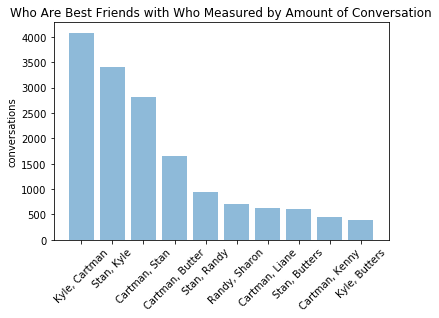

In [110]:
# Bar chart showing amount of interactions/conversation between top 10 pairs of chacracters 

friendship=['Kyle, Cartman', 'Stan, Kyle', 'Cartman, Stan','Cartman, Butter', 'Stan, Randy', 
            'Randy, Sharon', 'Cartman, Liane', 'Stan, Butters', 'Cartman, Kenny', 'Kyle, Butters']

conversation=[4083, 3397,2822 ,1657, 931, 709, 630, 604, 446, 384]

y_pos = np.arange(len(friendship))
plt.bar(y_pos, conversation, align='center', alpha=0.5)
plt.xticks(y_pos, friendship, rotation=45)
plt.ylabel('conversations')
plt.title('Who Are Best Friends with Who Measured by Amount of Conversation')
 
plt.show()

## 2. Charaters with Biggest Vocabulary: Word Count

In [111]:
#prepare character corpus by appending text in 'Character' column into list for each season:
#take the top 100 characters
characters= data['Character'].value_counts().index.tolist()
characters=characters[0:100]
characters

['Cartman',
 'Stan',
 'Kyle',
 'Butters',
 'Randy',
 'Mr. Garrison',
 'Chef',
 'Kenny',
 'Sharon',
 'Mr. Mackey',
 'Gerald',
 'Jimmy',
 'Wendy',
 'Liane',
 'Sheila',
 'Jimbo',
 'Announcer',
 'Stephen',
 'Craig',
 'Clyde',
 'Jesus',
 'Linda',
 'Principal Victoria',
 'Terrance',
 'Mrs. Garrison',
 'Token',
 'Timmy',
 'Mayor',
 'Tweek',
 'Phillip',
 'Bebe',
 'Man',
 'Woman',
 'Satan',
 'Ike',
 'Michael',
 'Shelly',
 'Chris',
 'Scott',
 'Pip',
 'Officer Barbrady',
 'Ms. Choksondik',
 'Narrator',
 'Dr. Doctor',
 'Barbrady',
 'Stuart',
 'Mr. Hankey',
 'Mephesto',
 'Doctor',
 'Kids',
 'Towelie',
 'General',
 'Reporter',
 'Man 2',
 'Yates',
 'Crowd',
 'Coon',
 'Mark',
 'Clerk',
 'Pete',
 'The Boys',
 'Mysterion',
 'Ned',
 'Man 1',
 'Mayor McDaniels',
 'Nathan',
 'Tom',
 'Driver',
 'Mrs. McCormick',
 'Marvin',
 'Thomas',
 'Priest Maxi',
 'Ms. Crabtree',
 'Saddam',
 'Gary',
 'Skeeter',
 'Kyle Two',
 'Field Reporter',
 'Steven',
 'Producer',
 'Red',
 'Mr. Slave',
 'Joe',
 'Santa',
 'Boys',
 'Pres

In [112]:
character_words=[]
for character in characters:
    words_this_character=[word for sublist in 
                          data.loc[data['Character']==character, 'parsed_Line'].str.strip('[]').str.split(',').tolist() 
                          for word in sublist]
    character_words.append(words_this_character)

#character_words

In [113]:
len(set(character_words[10]))
len(character_words[5])

8219

In [114]:
#get unique word count for each of top 100 characters:
unique_word_count=[]
for sublist in character_words:
    unique_word_count.append(len(set(sublist)))
unique_word_count

[9982,
 5453,
 5452,
 3874,
 3904,
 2377,
 1877,
 893,
 1413,
 1846,
 1365,
 1755,
 1235,
 1060,
 1121,
 1456,
 2110,
 1000,
 758,
 712,
 969,
 663,
 907,
 625,
 972,
 643,
 180,
 859,
 458,
 542,
 569,
 614,
 614,
 701,
 457,
 775,
 452,
 554,
 593,
 483,
 519,
 597,
 1332,
 662,
 499,
 495,
 528,
 548,
 717,
 196,
 335,
 492,
 1183,
 348,
 500,
 138,
 624,
 373,
 421,
 409,
 107,
 415,
 258,
 388,
 464,
 369,
 569,
 343,
 305,
 333,
 358,
 465,
 260,
 315,
 301,
 357,
 245,
 731,
 363,
 359,
 225,
 222,
 299,
 251,
 109,
 514,
 121,
 309,
 305,
 250,
 413,
 276,
 724,
 293,
 287,
 240,
 258,
 236,
 289,
 186]

In [115]:
#get appearance for each of hte top 100 characters, for weighted vocabulary count:
appearance= data['Character'].value_counts().tolist()[0:100]

In [116]:
#create vocabulary count table:
vocabulary=pd.DataFrame(
    {'character': characters,
     'vocabulary': unique_word_count,
     'appearance': appearance
    })

#top 10 characters in size of vocabulary:
vocab_10=vocabulary.sort_values('vocabulary', axis=0, ascending=False).head(10)
vocab_10

,appearance,character,vocabulary
0,9774,Cartman,9982
1,7680,Stan,5453
2,7099,Kyle,5452
4,2467,Randy,3904
3,2602,Butters,3874
5,1002,Mr. Garrison,2377
16,407,Announcer,2110
6,917,Chef,1877
9,633,Mr. Mackey,1846
11,597,Jimmy,1755


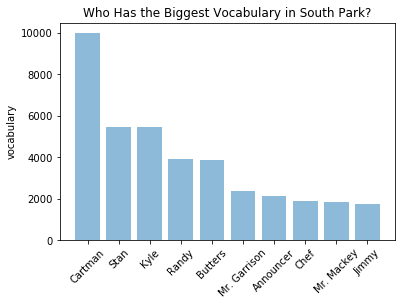

In [117]:
# Bar chart showing amount of interactions/conversation between top 10 pairs of chacracters 

y_pos = np.arange(len(vocab_10['character'].tolist()))
plt.bar(y_pos, vocab_10['vocabulary'], align='center', alpha=0.5)
plt.xticks(y_pos, vocab_10['character'].tolist(), rotation=45)
plt.ylabel('vocabulary')
plt.title('Who Has the Biggest Vocabulary in South Park?')
 
plt.show()

In [118]:
# since the amount of appearance of character partially contributes to the magnitude of vocabulary, 
#we also calculate a weighted-vocabulary by deviding vocabulary by appearance:
vocabulary['weighted_vocabulary']=vocabulary['vocabulary']/vocabulary['appearance']
vocab_weighted10=vocabulary.sort_values('weighted_vocabulary', axis=0, ascending=False).head(10)
vocab_weighted10

,appearance,character,vocabulary,weighted_vocabulary
92,66,Anchor,724,10.969697
52,125,Reporter,1183,9.464000
77,78,Field Reporter,731,9.371795
42,151,Narrator,1332,8.821192
85,74,President,514,6.945946
90,67,Singer,413,6.164179
66,98,Tom,569,5.806122
56,113,Coon,624,5.522124
71,85,Priest Maxi,465,5.470588
16,407,Announcer,2110,5.184275


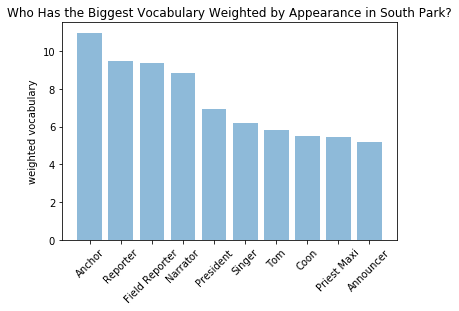

In [119]:
# Bar chart plot weighted vocabulary of top 10 characters

y_pos = np.arange(len(vocab_weighted10['character'].tolist()))
plt.bar(y_pos, vocab_weighted10['weighted_vocabulary'], align='center', alpha=0.5)
plt.xticks(y_pos, vocab_weighted10['character'].tolist(), rotation=45)
plt.ylabel('weighted vocabulary')
plt.title('Who Has the Biggest Vocabulary Weighted by Appearance in South Park?')
 
plt.show()

In [120]:
vocabulary.sort_values('vocabulary', axis=0, ascending=False).head(10)

,appearance,character,vocabulary,weighted_vocabulary
0,9774,Cartman,9982,1.021281
1,7680,Stan,5453,0.710026
2,7099,Kyle,5452,0.767995
4,2467,Randy,3904,1.582489
3,2602,Butters,3874,1.488855
5,1002,Mr. Garrison,2377,2.372255
16,407,Announcer,2110,5.184275
6,917,Chef,1877,2.046892
9,633,Mr. Mackey,1846,2.916272
11,597,Jimmy,1755,2.939698


## 3. Kenny's Destiny Over Seasons: how many times has Kenny died in each season?

In [121]:
#read in the parsed_Line as a list object saved in local file through pickle
import pickle

with open("parsed_Line.txt", "rb") as f:   # Unpickling
    parsed_Line = pickle.load(f)

len(parsed_Line) #checked

70896

In [122]:
season=list(range(1,19))
kenny_season_count=[]
kenny_keywords=['died', 'Died','death', 'Death','dead', 'Dead', 'die', 'Die','killed', 'Killed','kill', 'Kill']
for s in season:
    kenny_count = 0
    for index, row in data[data['Season']==str(s)].iterrows():
        if row['Line'].find('Kenny') == 1 & any(row['Line'].find(keyword) ==1 for keyword in kenny_keywords):
            kenny_count=kenny_count+1 #count kenny's death in each season
            
    kenny_season_count.append(kenny_count) #append kenny's death in this season to the list of death by season
                
kenny_season_count        

[3, 13, 8, 20, 8, 14, 6, 3, 11, 5, 5, 11, 9, 10, 1, 6, 2, 3]

In [123]:
#create kenny death count table
kenny_death=pd.DataFrame(
    {'season': season,
     'kenny_death': kenny_season_count
    })

#rank seasons by kenny death count:
kenny_death.sort_values('kenny_death', axis=0, ascending=False)

,kenny_death,season
3,20,4
5,14,6
1,13,2
8,11,9
11,11,12
13,10,14
12,9,13
2,8,3
4,8,5
6,6,7


In [124]:
death_sorted=kenny_death.sort_values('season', axis=0, ascending=True)
death_sorted

,kenny_death,season
0,3,1
1,13,2
2,8,3
3,20,4
4,8,5
5,14,6
6,6,7
7,3,8
8,11,9
9,5,10


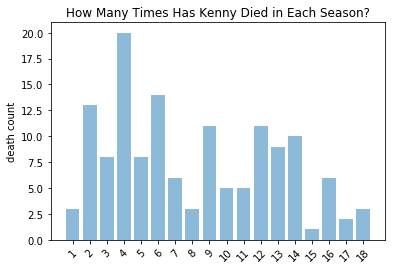

In [125]:
# Bar chart plot weighted vocabulary of top 10 characters

y_pos = np.arange(len(death_sorted['season'].tolist()))
plt.bar(y_pos, death_sorted['kenny_death'], align='center', alpha=0.5)
plt.xticks(y_pos, death_sorted['season'].tolist(), rotation=45)
plt.ylabel('death count')
plt.title('How Many Times Has Kenny Died in Each Season?')
 
plt.show()

In [126]:
print('On average, Kenny will die {} times per season'.format(kenny_death['kenny_death'].mean(axis=0)))

On average, Kenny will die 7.666666666666667 times per season


In [127]:
# get total number of episodes in Sounth Park and calculate Kenny's death per episode:
episodes=len(data.groupby(['Season', 'Episode']).groups)
print('On average, Kenny will die {} times per episode'.format(kenny_death['kenny_death'].sum(axis=0)/episodes))

On average, Kenny will die 0.5369649805447471 times per episode
